In [12]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

# Performance between Groups



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# load primary data
primaryData = pd.read_csv(r'./data/table1.csv')
primaryData = primaryData[primaryData['Experimental Status']!='Disceased']
primaryData.drop(['Age (wks)','Birth status', 'Estimated Delivery Date', 'Delivery Date', 
              'Set up', 'Ween', 'Male Status', 'Breeding Status',
              'Virus Implantation'],axis=1,inplace=True)

primaryData

,Mouse ID,Genotype,Gender,Line,TgSWDI,Genotype 2,Genotype 3,Father,Mother,DOB,Maze Configuration,Treatment Group,Experimental Status
0,170,Tg-SwDI,M,Tg-SwDI,Pos,NaN,NaN,Tg-SwDI (116),Tg-SwDI (117),8/2/2019,ABFG,--,Testing
1,171,Tg-SwDI,M,Tg-SwDI,Pos,NaN,NaN,Tg-SwDI (116),Tg-SwDI (117),8/2/2019,ABFG,--,Testing
2,224,Tg-SwDI,M,Tg-SwDI x ThCre,Pos,Neg,NaN,Tg-SwDI(116),ThCre(71/99),8/24/2019,ABFG,--,Testing
3,225,Tg-SwDI,M,Tg-SwDI x ThCre,Pos,Neg,NaN,Tg-SwDI(116),ThCre(71/99),8/24/2019,ABFG,--,Testing
4,233,Tg-SwDI,M,Tg-SwDI x ThCre,Pos,Neg,NaN,Tg-SwDI(116),ThCre(71/99),8/24/2019,ABFG,--,Testing
5,172,Tg-SwDI,F,NaN,Pos,NaN,NaN,Tg-SwDI (116),Tg-SwDI (117),8/2/2019,BCEG,--,Testing
6,173,Tg-SwDI,F,Tg-SwDI,Pos,NaN,NaN,Tg-SwDI (116),Tg-SwDI (117),8/2/2019,BCEG,--,Testing
7,174,Tg-SwDI,F,Tg-SwDI,Pos,NaN,NaN,Tg-SwDI (116),Tg-SwDI (117),8/2/2019,BCEG,--,Testing
8,175,Tg-SwDI,F,Tg-SwDI,Pos,NaN,NaN,Tg-SwDI (116),Tg-SwDI (117),8/2/2019,BCEG,--,Testing
9,231,Tg-SwDI,F,Tg-SwDI,Pos,NaN,NaN,Tg-SwDI(116),ThCre(71/99),8/24/2019,BCEG,--,Testing


In [3]:
# load experimental data
experimentalData = pd.read_csv(r'./data/table2.csv')
experimentalData = experimentalData[experimentalData['Date']>='2020-01-01']
experimentalData

,Mouse ID,Date,Weight,Baited Arms Retrieved,Reference Memory Errors,Working Memory Errors,Other Notes,Start Time,End Time,Video Length,...,Distance,Center,ArmA,ArmB,ArmC,ArmD,ArmE,ArmF,ArmG,ArmH
442,285,2020-01-01,25,0,16,23,NaN,2020-01-01 12:31:07,2020-01-01 12:41:07,0:10:00,...,21840.552995,0.111185,0.080736,0.050119,0.040173,0.234928,0.191365,0.187087,0.046674,0.058621
443,71,2020-01-01,25,1,29,53,NaN,2020-01-01 15:36:00,2020-01-01 15:46:00,0:10:00,...,31366.376863,0.180530,0.094627,0.126299,0.101295,0.118186,0.095016,0.057065,0.150414,0.079069
444,260,2020-01-01,28,1,23,27,NaN,2020-01-01 13:18:12,2020-01-01 13:28:02,0:09:50,...,16997.318591,0.117993,0.168230,0.081657,0.080018,0.156476,0.221349,0.049051,0.050746,0.077588
445,261,2020-01-01,28,0,26,46,NaN,2020-01-01 13:40:21,2020-01-01 13:49:55,0:09:34,...,27863.110858,0.216202,0.078223,0.096806,0.122706,0.142509,0.096632,0.101278,0.076829,0.071661
446,284,2020-01-01,22,0,14,24,NaN,2020-01-01 12:08:45,2020-01-01 12:18:45,0:10:00,...,20624.253365,0.129188,0.178530,0.110630,0.085514,0.263933,0.028394,0.084125,0.051120,0.069512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,207,2020-02-29,30,4,3,3,NaN,2020-02-29 15:54:14,2020-02-29 15:55:40,0:01:26,...,4644.497932,0.076744,0.087984,0.191085,0.148837,0.059302,0.188372,0.161628,0.086822,0.000000
945,202,2020-02-29,30,4,9,10,NaN,2020-02-29 15:21:45,2020-02-29 15:28:48,0:07:03,...,11987.690376,0.063617,0.146051,0.168727,0.068420,0.233367,0.138572,0.025667,0.075663,0.080545
946,178,2020-02-29,28,4,5,4,NaN,2020-02-29 17:49:36,2020-02-29 17:53:42,0:04:06,...,6935.927508,0.041384,0.177748,0.039213,0.014111,0.068657,0.299322,0.182632,0.066757,0.111398
947,211,2020-02-29,24,4,6,2,GABF,2020-02-29 14:33:15,2020-02-29 14:34:35,0:01:20,...,4191.584958,0.086164,0.223695,0.203397,0.044739,0.099420,0.050539,0.058824,0.192626,0.041839


In [4]:
# all mice under test
primaryData = primaryData[primaryData['Experimental Status']=='Testing']

In [5]:
# number of valid mice (testing)
allMice = list(pd.unique(primaryData['Mouse ID']))
len(allMice)

41

### Grouping

Genotype Groups:
    1. Tg-SwDI+
    2. Th-Cre+
    3. Tg-SwDI+ x Th-Cre+ low dose group
    4. Tg-SwDI+ x Th-Cre+ high dose group

In [6]:
class Group:
    
    def __init__(self,primaryData,experimentalData,genotype,treatment):
        
        groupPrimaryData = primaryData[primaryData['Genotype']==genotype]
        groupPrimaryData = groupPrimaryData[groupPrimaryData['Treatment Group']==treatment]
        groupPrimaryData.reset_index(drop=True,inplace=True)
        
        self.name = genotype + '(' + treatment + ')'
        self.groupPrimaryData = groupPrimaryData
        self.genotype = genotype
        self.treatment = treatment
        self.members = list(groupPrimaryData['Mouse ID'])
        self.size = len(list(groupPrimaryData['Mouse ID']))
        
        def in_group(x):
            return str(x) in self.members
        groupExperimentalData = experimentalData[experimentalData['Mouse ID'].apply(in_group)]
        groupExperimentalData.reset_index(drop=True,inplace=True)
        self.groupExperimentalData = groupExperimentalData

        
    def info(self):
        print('---------------------------------')
        print('Genotype:',self.genotype,' | Treatment:',self.treatment)
        print('Members:',self.members)
        print('Size:',self.size)
        return


In [7]:
group1 = Group(primaryData,experimentalData,'Tg-SwDI','--')
group2 = Group(primaryData,experimentalData,'Tg-SwDI','MAMP')
group3 = Group(primaryData,experimentalData,'ThCre','--')
group4 = Group(primaryData,experimentalData,'Tg-SwDI x ThCre','Low Dose CNO')
group5 = Group(primaryData,experimentalData,'Tg-SwDI x ThCre','High Dose CNO')


grouping = [group1,group2,group3,group4,group5]

In [8]:
class Mouse:
    
    
    def __init__(self, grouping, ID: str):
        # grouping should be a list of Group objects
        self.ID = ID 
        for group in grouping:
            if ID in group.members:
                self.category = group.name 
                self.primaryData = group.groupPrimaryData[group.groupPrimaryData['Mouse ID']==self.ID]
                experimentalData = group.groupExperimentalData[group.groupExperimentalData['Mouse ID']==int(self.ID)]
                experimentalData.reset_index(drop=True, inplace=True)
                self.experimentalData = experimentalData
    
    def get_age_wks(self,date):
        # return age(wks) rounded
        self.primaryData['Age(days)'] = np.empty_like(self.primaryData['Mouse ID'])
        today = pd.to_datetime(str(datetime.date.today()))
        
        for i in list(self.primaryData.index):
            dob = pd.to_datetime(str(self.primaryData['DOB'][i]))
            age_days = str(date - dob)[:-14]
            age_wks = math.ceil(int(age_days) / 7.0)
            
        return age_wks
    
    
    def get_weekly_performance(self):

        m_df = self.experimentalData[['Date','Weight','Baited Arms Retrieved','Reference Memory Errors','Working Memory Errors','Video Length']]
        m_df['Date'] = pd.to_datetime(m_df['Date'])

        bins_dt = pd.date_range('2020-01-01', freq='7D', periods=100)
        bins_str = bins_dt.astype(str).values

        labels = ['({}, {}]'.format(bins_str[i-1], bins_str[i]) for i in range(1, len(bins_str))]


        m_df['cat'] = pd.cut(m_df.Date.astype(np.int64)//10**9,
                           bins=bins_dt.astype(np.int64)//10**9,
                           labels=labels)
        m_df['cat'] = m_df['cat'].cat.remove_unused_categories()
        
        m_df['Age(wks)'] = np.empty_like(m_df['Date'])
        for i in range(len(m_df['Date'])):
            m_df.loc[i,'Age(wks)'] = int(self.get_age_wks(m_df.loc[i,'Date']))
        m_df['Age(wks)'] = m_df['Age(wks)'].astype(int)
        
        m_df['Mouse ID'] = np.empty_like(m_df['Date'])
        for i in range(len(m_df['Date'])):
            m_df.loc[i,'Mouse ID'] = self.ID
        
        m_df = m_df[['Date','Mouse ID','Weight','Age(wks)','Baited Arms Retrieved','Reference Memory Errors','Working Memory Errors','Video Length','cat']]
        m_df.sort_values(by='Date',inplace=True)
        m_df.reset_index(drop=True,inplace=True)
        
        return m_df


In [9]:
##############################################################################

def collect_weekly_performance(group=None):
    
    if group == None:
        # get weekly data for all mice
        m_ID = allMice[0]
        m = Mouse(grouping,m_ID)
        df = m.get_weekly_performance()
        
        for m_ID in allMice[1:]:

            m = Mouse(grouping,m_ID)
            df_append = m.get_weekly_performance()
            df = pd.concat([df,df_append],axis=0)
        
        df.sort_values(by='Age(wks)',inplace=True)
        return df
    
    else:
        # get weekly data for mice in one group
        m_ID = group.members[0]
        m = Mouse(grouping,m_ID)
        df = m.get_weekly_performance()
        
        for m_ID in group.members[1:]:
            
            m = Mouse(grouping,m_ID)
            df_append = m.get_weekly_performance()
            df = pd.concat([df,df_append],axis=0)
        
        return df

##############################################################################

def get_weekly_mean(df):
    
    df_mean = df.groupby('Age(wks)').mean()
    df_mean.reset_index(drop=False,inplace=True)
    df_mean.sort_values(by='Age(wks)',inplace=True)
    df_mean.reset_index(drop=True,inplace=True)
    
    return df_mean

##############################################################################

def plot_weekly_mean(df_mean,group,ax):
    
    weight_mean = df_mean['Weight']
    finished_mean = df_mean['Baited Arms Retrieved']
    rme_mean = df_mean['Reference Memory Errors']
    wme_mean =  df_mean['Working Memory Errors']
    
    age_wks = sorted(df_mean['Age(wks)'])
    
    l1, = plt.plot(age_wks,rme_mean,label='avg_RME')
    l2, = plt.plot(age_wks,wme_mean,label='avg_WME') 
    ax.legend()
    ax.set_title(group.name)
    ax.set_xlabel('Age(wks)')
    ax.set_ylabel('Errors')

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

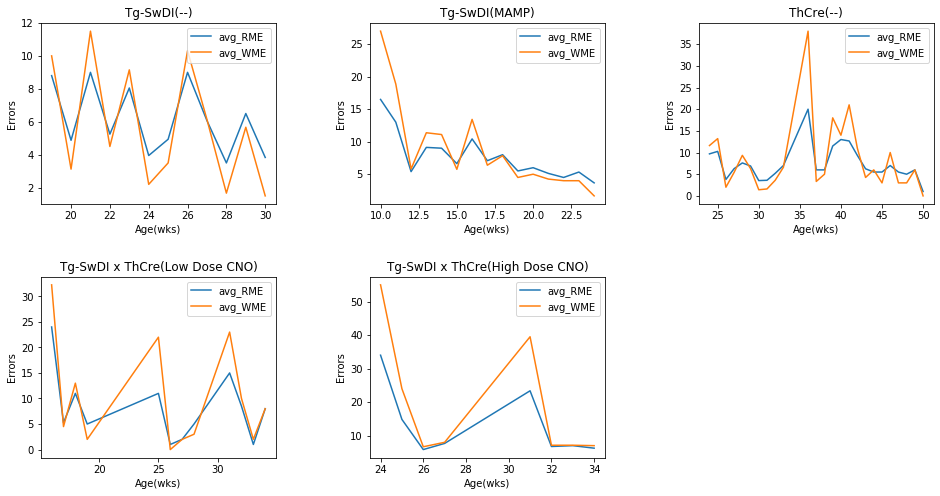

In [10]:
fig = plt.figure(figsize=(16,8))
i = 1

for group in grouping:
    
    df = collect_weekly_performance(group)
    df_mean = get_weekly_mean(df)
    
    ax = fig.add_subplot(2,3,i)
    plot_weekly_mean(df_mean,group,ax)

    i += 1

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)
plt.show()


# Performance of Individuals

In [ ]:
# bar plot and pie chart


In [21]:
#boxplot
